## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
import pandas as pd
import tensorflow as tf


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset('emotion')


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train=dataset['train']
valid=dataset['validation']
test=dataset['test']

In [ ]:
dataframe = pd.DataFrame(train)

# Display the DataFrame
print(dataframe.head(10))

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
5  ive been feeling a little burdened lately wasn...      0
6  ive been taking or milligrams or times recomme...      5
7  i feel as confused about life as a teenager or...      4
8  i have been with petronas for years i feel tha...      1
9                                i feel romantic too      2


In [ ]:
def get_tweet(data):
  tweets=[x['text'] for x in data]
  lables=[x['label'] for x in data]
  return tweets,lables

In [ ]:
tweets,lables=get_tweet(train)

In [ ]:
dat_fr=pd.DataFrame(tweets)
print(dat_fr.head())

                                                   0
0                            i didnt feel humiliated
1  i can go from feeling so hopeless to so damned...
2   im grabbing a minute to post i feel greedy wrong
3  i am ever feeling nostalgic about the fireplac...
4                               i am feeling grouchy


In [ ]:
tweets[2],lables[2]

('im grabbing a minute to post i feel greedy wrong', 3)

## Task 4: Tokenizer

1. Tokenizing the tweets

(It means "we are representing the words in numbers" innorder to do data analysis, we need to input in numeical forms)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

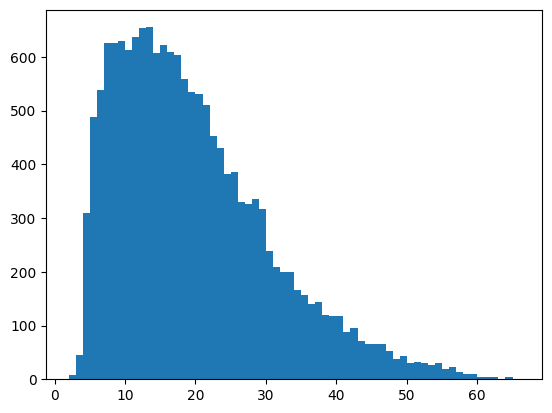

In [ ]:
lengths=[len(t.split(" ")) for t in tweets]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [ ]:
maxlen=50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences,truncating='post',padding='post',maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq=get_sequences(tokenizer,tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels
***{Note: For our data set no need to create lables. because they are already in numerical form. for practice, we manually assigned text and recreated the numerical lables}***

In [ ]:
print(lables)

[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1, 4, 1, 3, 3, 2, 0, 5, 1, 3, 0, 0, 3, 2, 5, 0, 2, 1, 3, 1, 0, 0, 1, 1, 4, 0, 3, 1, 2, 1, 1, 

In [ ]:
print(set(lables))

{0, 1, 2, 3, 4, 5}


In [ ]:
classes=set(lables)
print(classes)

{0, 1, 2, 3, 4, 5}


In [ ]:
emotions=['anger','joy','love','surprise','fear','sadness']

In [ ]:
class_to_index=dict((c,i) for i, c in enumerate(emotions))
index_to_class=dict((v,k) for k, v in class_to_index.items())

In [ ]:
class_to_index

{'anger': 0, 'joy': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'sadness': 5}

In [ ]:
index_to_class

{0: 'anger', 1: 'joy', 2: 'love', 3: 'surprise', 4: 'fear', 5: 'sadness'}

In [ ]:

names_to_ids=lambda lables: np.array([index_to_class.get(x) for x in lables])


In [ ]:
train_lables=names_to_ids(lables)

print(train_lables[3])

love


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
valid_tweets,valid_lables=get_tweet(valid)
valid_seq=get_sequences(tokenizer,valid_tweets)
#valid_lables=names_to_ids(valid_lables)

In [ ]:
valid_tweets[0],valid_lables[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
tf.version
!pip install --upgrade tensorflow


In [ ]:
train_lables

In [ ]:
valid_lables

In [ ]:
import numpy as np

padded_train_seq = np.array(padded_train_seq)
train_labels = np.array(lables)
valid_seq = np.array(valid_seq)
valid_labels = np.array(valid_lables)


In [ ]:
h=model.fit(padded_train_seq,train_labels,
            validation_data=(valid_seq,valid_labels),
            epochs=20,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
            )

Epoch 1/20
500/500 [==============================] - 43s 68ms/step - loss: 1.3602 - accuracy: 0.4397 - val_loss: 0.9882 - val_accuracy: 0.6380
Epoch 2/20
500/500 [==============================] - 10s 20ms/step - loss: 0.6230 - accuracy: 0.7759 - val_loss: 0.5094 - val_accuracy: 0.8365
Epoch 3/20
500/500 [==============================] - 8s 16ms/step - loss: 0.3056 - accuracy: 0.9042 - val_loss: 0.4481 - val_accuracy: 0.8565
Epoch 4/20
500/500 [==============================] - 8s 17ms/step - loss: 0.1971 - accuracy: 0.9385 - val_loss: 0.4611 - val_accuracy: 0.8605
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1370 - accuracy: 0.9579 - val_loss: 0.4346 - val_accuracy: 0.8745
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: 0.1127 - accuracy: 0.9638 - val_loss: 0.4600 - val_accuracy: 0.8760
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0859 - accuracy: 0.9743 - val_loss: 0.4241 - val_accuracy: 0.88

In [ ]:
train_lables

array(['anger', 'anger', 'surprise', ..., 'joy', 'surprise', 'anger'],
      dtype='<U8')

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

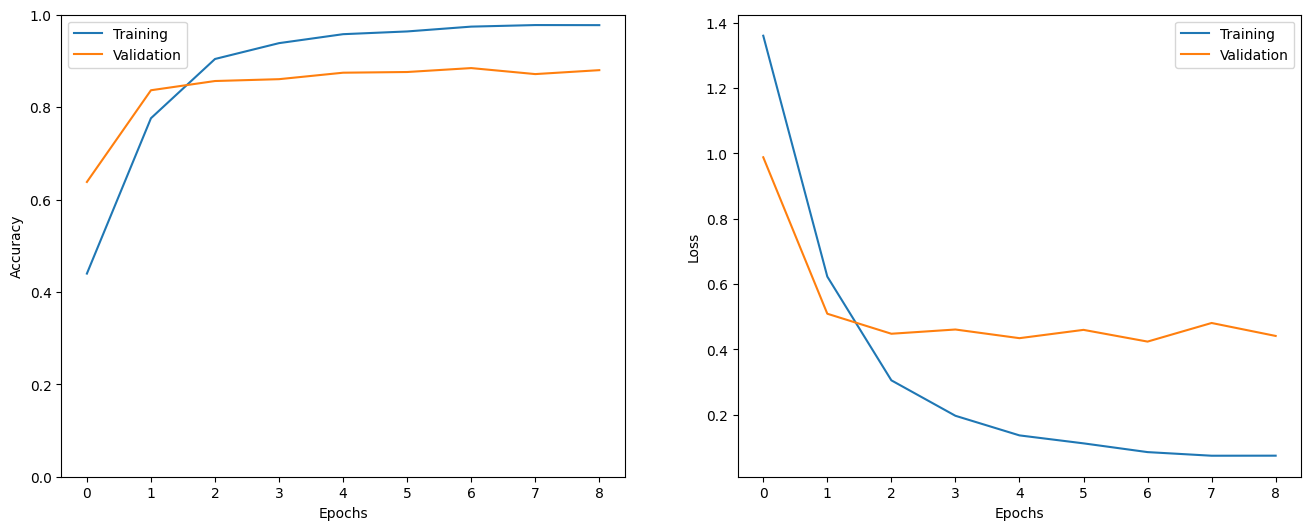

In [ ]:
show_history(h)

In [ ]:
test_tweets,test_lables=get_tweet(test)
test_seq=get_sequences(tokenizer,test_tweets)


In [ ]:

test_labels = np.array(test_lables)
test_seq = np.array(test_seq)


In [ ]:
_=model.evaluate(test_seq,test_labels)

63/63 [==============================] - 1s 16ms/step - loss: 0.4282 - accuracy: 0.8810


In [ ]:
i=random.randint(0,len(test_labels)-1)

print('Sentence:',test_tweets[i])
print('Emotion:',index_to_class[test_labels[i]])

p=model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class=index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:',pred_class)


Sentence: i started to feel so overwhelmed
Emotion: fear
1/1 [==============================] - 0s 23ms/step
Predicted Emotion: fear


In [ ]:
preds=model.predict(test_seq)

# Converting predicted probabilities to class labels
preds_class = np.argmax(preds, axis=1)

63/63 [==============================] - 0s 7ms/step


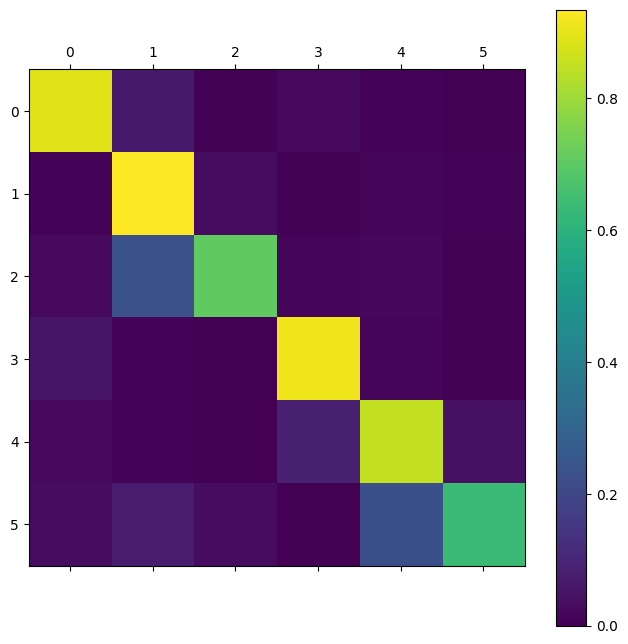

In [ ]:
show_confusion_matrix(test_labels,preds_class,list(classes))